<a href="https://colab.research.google.com/github/sushiiel22bds0390/prettiere22/blob/main/adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X: [0, 1, 2, 3, 4, 5, 6, 7]
Y: [8]
Accuracy for 0.4 test_size : 77.27272727272727 %
Accuracy for 0.3 test_size : 74.89177489177489 %
Accuracy for 0.25 test_size : 79.16666666666666 %
Accuracy for 0.2 test_size : 77.92207792207793 %
Accuracy for 0.1 test_size : 79.22077922077922 %
Accuracy for 0.05 test_size : 92.3076923076923 %


[Text(0.5, 0, 'Test Size Ratio'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Accuracy Graph for Ada boost Classifier')]

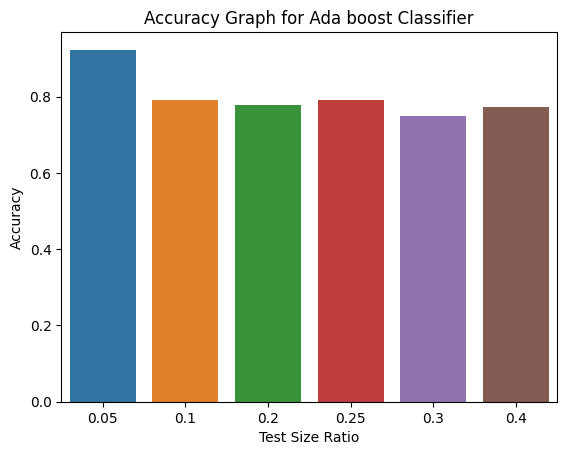

In [10]:
import pandas as pd
df = pd.read_csv('/content/sample_data/diabetes 2.csv')
df.describe()
df.shape
df.head()
import numpy as np

x_data = [x for x in range(len(df.columns))] # Add up all independent variables dynamically
x_data.pop() # Remove the last column as its a dependent variable

y_data = [len(df.columns)-1]


print('X:', x_data)
print('Y:',y_data)

x = df.iloc[:, x_data].values
y = np.ravel(df.iloc[:, y_data].values)
from sklearn.model_selection import train_test_split

test_sizes = [0.4, 0.3, 0.25, 0.2, 0.1, 0.05]

data_sets = {}

for i in test_sizes:
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=i, random_state=0)
    data_sets[i] = {
        "xtrain": xtrain,
        "xtest": xtest,
        "ytrain": ytrain,
        "ytest": ytest,
    }
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
import seaborn as sns

accuracy_map = {}

for k,v in data_sets.items():
    sc_x = StandardScaler()
    xtrain = sc_x.fit_transform(v['xtrain'])
    xtest = sc_x.transform(v['xtest'])
    # print (xtrain[0:10, :])

    classifier = AdaBoostClassifier()
    classifier.fit(xtrain, v['ytrain'])
    y_pred = classifier.predict(xtest)
    accuracy_map[k] = accuracy_score(v['ytest'], y_pred)
    print (f"Accuracy for {k} test_size :", accuracy_map[k]*100, "%")

data = pd.DataFrame(accuracy_map.items())
graph = sns.barplot(x=0, y=1, data=data)
graph.set(xlabel = 'Test Size Ratio', ylabel='Accuracy', title='Accuracy Graph for Ada boost Classifier')